## 🤯 EmotionArcs

This script showcases the data released, which can be used to look into the emotional intensities and emotion arcs of 9,000 novels.



In [158]:
try:
    import pandas as pd
    import json
    import glob
    import seaborn as sns
    import matplotlib.pyplot as plt
except:
    !pip install pandas, json, glob, seaborn, matplotlib.pyplot

### Download

Download the data by cloning the GitHub repository and add the path in the cell below

In [11]:
path = "" # set path to the directory cloned from the github repository
all_files = glob.glob(f"{path}/data/*")

# getting the two different types of data (intensities and arcs)
all_arcs_files = [f for f in all_files if 'arcs' in f]
intensities_file = [f for f in all_files if 'arcs' not in f]

In [22]:
# Opening the arcs files and compiling them into a dictionary

emotional_dictionary = {}

for emotion_path in all_arcs_files:

    emotion_arcs = {}

    # get name of emotion
    emotion_name = emotion_path.split("/")[-1].split(".")[0]
    print(emotion_name)

    # open file
    with open(emotion_path) as f:
        emotion = json.load(f)
    
    # save to dict
    emotional_dictionary[emotion_name] = emotion

# Creating an arcs df
df_arcs = pd.DataFrame.from_dict(emotional_dictionary).reset_index()
df_arcs.rename(columns={'index': 'BOOK_ID'}, inplace=True)
df_arcs.head()

tru_arcs
joy_arcs
ant_arcs
fea_arcs
sad_arcs
dis_arcs
ang_arcs
sur_arcs


In [58]:
# Opening the intensities file and adding it to the dataframe
with open(intensities_file[0]) as f:
    intensities = json.load(f)

df_intensities = pd.DataFrame.from_dict(intensities, orient='index').reset_index()
df_intensities.rename(columns={'index': 'BOOK_ID'}, inplace=True)

df = pd.merge(df_intensities, df_arcs, on='BOOK_ID').reset_index(drop=True)
df.head()

,BOOK_ID,INTENS_anger,INTENS_anticipation,INTENS_disgust,INTENS_fear,INTENS_joy,INTENS_sadness,INTENS_surprise,INTENS_trust,AUTH_LAST,...,PUBL_DATE,TITLE,tru_arcs,joy_arcs,ant_arcs,fea_arcs,sad_arcs,dis_arcs,ang_arcs,sur_arcs
0,20564.0,23.520468,76.906702,19.557844,29.383902,71.230915,46.496952,34.861538,82.532918,Webb,...,1963,The Graduate,"[5.961, 7.164, 5.0, 5.313, 6.982, 5.82, 2.643,...","[4.085, 5.732, 5.733, 3.71, 3.153, 5.294, 2.14...","[4.319, 4.694, 4.577, 2.616, 3.359, 2.851, 1.4...","[0.422, 0.406, 1.266, 2.819, 0.652, 3.157, 0.9...","[2.755, 2.684, 1.059, 4.357, 1.26, 1.669, 2.92...","[0.344, 0.133, 0.899, 1.141, 0.438, 0.399, 4.2...","[1.401, 1.131, 0.422, 0.561, 0.764, 0.772, 0.4...","[0.586, 2.256, 2.047, 0.578, 1.711, 2.766, 2.7..."
1,25455.0,31.690087,79.197897,30.002665,43.669505,111.444288,67.794033,33.405493,106.391353,Cameron,...,1994,The Weekend,"[5.839, 5.861, 3.156, 5.281, 3.921, 5.748, 4.7...","[8.676, 8.795, 5.794, 7.091, 7.387, 7.515, 5.6...","[6.602, 5.454, 4.366, 4.772, 3.779, 3.226, 3.8...","[3.292, 2.5, 3.641, 1.203, 5.462, 2.306, 2.526...","[6.843, 2.427, 1.674, 1.64, 7.433, 1.444, 3.09...","[1.289, 1.899, 0.625, 1.312, 1.274, 1.486, 0.2...","[1.904, 2.678, 1.706, 1.324, 1.539, 1.071, 0.5...","[3.256, 2.663, 0.976, 0.563, 2.945, 1.71, 0.42..."
2,25893.0,63.432568,87.985586,30.762940,94.033732,68.241786,69.474771,44.738659,101.337125,Hamilton,...,1998,A Cold Day In Paradise,"[6.0, 7.789, 2.42, 2.758, 7.287, 6.722, 6.865,...","[6.799, 4.396, 2.254, 2.247, 3.654, 5.562, 5.7...","[5.977, 8.047, 2.374, 3.328, 2.756, 4.793, 8.6...","[4.009, 7.527, 1.96, 5.662, 3.797, 1.016, 1.76...","[1.95, 5.05, 0.731, 4.616, 4.032, 2.452, 2.977...","[1.415, 1.829, 0.133, 1.539, 2.086, 0.719, 1.6...","[3.793, 3.963, 0.411, 4.054, 3.718, 0.708, 1.8...","[3.906, 6.689, 1.508, 2.757, 1.313, 2.68, 4.85..."
3,10552.0,46.316078,104.061841,28.702605,50.505605,106.271628,55.472400,49.070962,107.349779,McCoy,...,1938,I Should Have Stayed Home,"[4.571, 5.586, 5.881, 4.311, 7.359, 3.476, 5.2...","[5.853, 3.294, 6.237, 3.606, 4.885, 5.897, 6.1...","[7.41, 5.585, 7.986, 2.882, 4.744, 3.928, 6.02...","[5.245, 7.599, 6.216, 2.269, 2.55, 8.101, 2.21...","[3.466, 12.216, 7.015, 3.314, 2.108, 6.299, 2....","[0.656, 4.766, 3.071, 0.898, 2.147, 3.226, 1.7...","[1.577, 7.541, 3.596, 0.75, 1.981, 6.905, 2.03...","[5.484, 3.703, 1.719, 1.633, 1.445, 3.25, 1.98..."
4,25269.0,45.904266,81.471076,29.567275,61.280643,101.297648,58.875041,43.444164,121.507621,Robbins,...,1991,The Piranhas,"[6.734, 5.013, 4.562, 13.0, 9.462, 9.142, 9.65...","[5.351, 2.395, 2.057, 6.976, 3.362, 6.99, 6.83...","[5.209, 4.164, 4.18, 4.342, 5.711, 7.113, 3.64...","[7.518, 7.599, 7.58, 3.077, 7.058, 3.575, 2.34...","[7.938, 7.363, 10.077, 7.271, 13.737, 5.171, 2...","[2.624, 1.829, 3.179, 0.875, 0.75, 1.898, 1.12...","[3.087, 3.568, 4.033, 1.017, 1.54, 1.6, 1.2, 2...","[2.406, 2.968, 1.18, 0.344, 1.178, 2.227, 3.01..."


## 🔥 Comparing intensities

We can look at the intensities and correlate them with other things (like publication date)

💡 Keep an eye on our [Fabula-NET page](https://centre-for-humanities-computing.github.io/fabula-net/blog/), since we will soon be publishing other metadata to go with this dataset, such as GoodReads scores, etc. This dataset coming out will have the same BOOK_IDs indexing the titles, so that it's easy to use the datasets together.

In [110]:
feature_to_check = 'INTENS_anger'

df[['BOOK_ID', 'TITLE', 'AUTH_FIRST', 'AUTH_LAST','PUBL_DATE', feature_to_check]].nlargest(10, feature_to_check)

,BOOK_ID,TITLE,AUTH_FIRST,AUTH_LAST,PUBL_DATE,INTENS_anger
8522,1161.0,The Red Badge Of Courage,Stephen,Crane,1895,173.096326
7571,11604.0,Fools' Harvest,Erle,Cox,1939,159.796521
4734,25824.0,The Way Of The Traitor,Laura Joh,Rowland,1997,152.988242
8929,23994.0,The Curse Of The Mistwraith,Janny,Wurts,1993,152.490822
7848,20951.0,The Trojan War,Bernard,Evslin,1971,150.159442
7749,3699.0,The Beasts Of Tarzan,Edgar Rice,Burroughs,1914,149.869769
8748,10993.0,Conan The Conqueror,Robert E.,Howard,1950,149.862913
8865,4865.0,Men In War,Andreas,Latzko,1918,148.915752
6372,10852.0,Spirits Rebellious,Kahlil,Gibran,1947,147.604811
8233,3484.0,Fran,John Breckinridge,Ellis,1912,147.483488


<Axes: xlabel='PUBL_DATE', ylabel='INTENS_anger'>

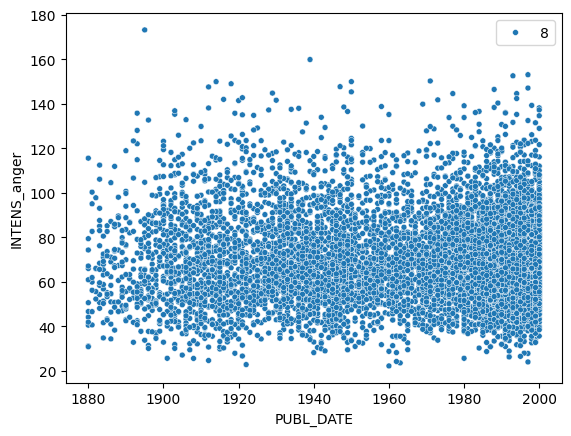

In [72]:
sns.scatterplot(data=df, x='PUBL_DATE', y=feature_to_check, size=8)

## 📈 Drawing arcs per emotion

We can also plot the arcs as such for all 8 emotions (for each book) 

Text(0.5, 1.0, 'The Old Man And The Sea, Emotion arc: ANG')

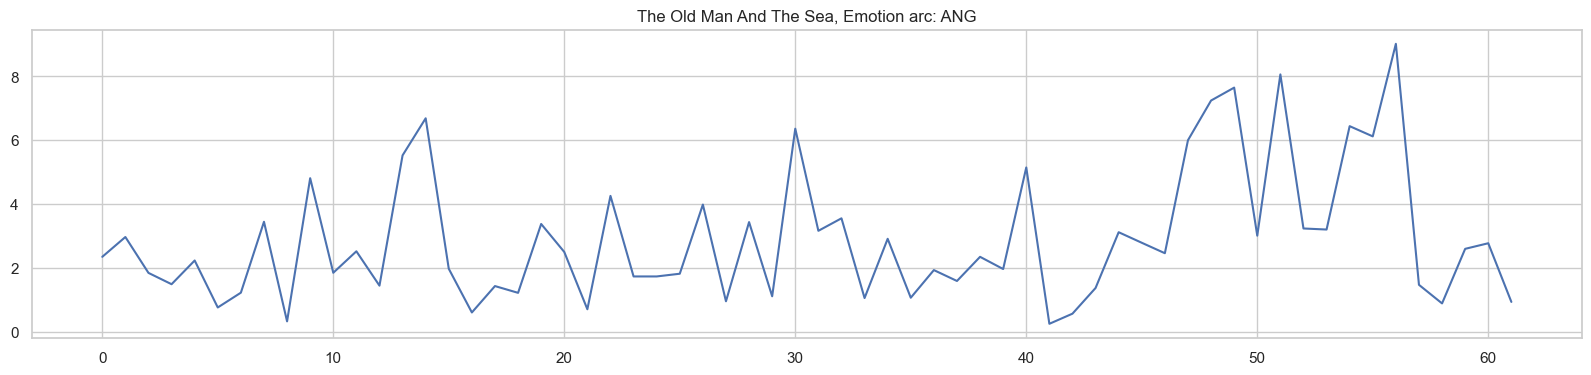

In [165]:
title = 'the old man and the sea' # we can change this to any title we want to check
emotion_to_plot = 'ang' # we can change this to any emotion we want to check

# selecting the title
test_line = df.loc[df['TITLE'] == title.title()]

# selecting only the arcs columns
arcs_cols = [col for col in test_line.columns if 'arc' in col] 
sel_cols_test = test_line[arcs_cols]


# Selecting only one of the emotions
digit_test_line = sel_cols_test[f'{emotion_to_plot}_arcs'].values[0]

plt.figure(figsize=(20,4))
sns.set_theme(style='whitegrid')
plt.plot(digit_test_line)
plt.title(f'{title.title()}, Emotion arc: {emotion_to_plot.upper()}')
